In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',500)
%matplotlib inline

In [46]:
df = pd.read_csv('fifa19.zip')

In [47]:
df.shape

(18207, 89)

In [48]:
df.drop(list(df.columns)[0],axis=1,inplace=True)

In [49]:
df.drop(['Photo','Flag','Club Logo','Body Type','Real Face',
        'Joined','Loaned From','Contract Valid Until','LS',
 'ST','RS','LW','LF','CF','RF','RW',
 'LAM','CAM','RAM','LM','LCM','CM',
 'RCM','RM','LWB','LDM','CDM','RDM',
 'RWB','LB','LCB','CB','RCB','RB','Special'],axis=1,inplace=True)

In [50]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,5.0,4.0,4.0,Medium/ Medium,RF,10.0,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,5.0,4.0,5.0,High/ Low,ST,7.0,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,5.0,5.0,High/ Medium,LW,10.0,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,4.0,3.0,1.0,Medium/ Medium,GK,1.0,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,4.0,5.0,4.0,High/ High,RCM,7.0,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [51]:
def cantidad(x):
    x = x[1:]
    if x[-1]=='K':
        return float(x[:-1])*1000
    elif x[-1]=='M':
        return float(x[:-1])*1000000
    else:
        return float(x)

In [52]:
df['Value'] = df['Value'].map(cantidad)
df['Wage'] = df['Wage'].map(cantidad)
df['Release Clause'] = df['Release Clause'].fillna('€0M').map(cantidad)

In [61]:
df['Height'] = df['Height'].fillna("0'0").map(lambda x:x.split("'")) 

In [63]:
df['Height'] = df['Height'].map(lambda x:float(x[0])*30.48+float(x[1])*2.54)

In [68]:
df['Weight'] = df['Weight'].fillna('9999').map(lambda x:x.replace('lbs','')).astype(int)

In [71]:
df['Weight'] = df['Weight'].replace({9999:np.nan})*0.454

In [72]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,5.0,4.0,4.0,Medium/ Medium,RF,10.0,170.18,72.186,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,4.0,5.0,High/ Low,ST,7.0,187.96,83.082,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,5.0,5.0,5.0,High/ Medium,LW,10.0,175.26,68.100,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,4.0,3.0,1.0,Medium/ Medium,GK,1.0,193.04,76.272,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,4.0,5.0,4.0,High/ High,RCM,7.0,180.34,69.916,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


In [73]:
varc = [
 'Age',
 'Overall',
 'Potential',
 'Value',
 'Wage',
 'Height',
 'Weight',
 'Crossing',
 'Finishing',
 'HeadingAccuracy',
 'ShortPassing',
 'Volleys',
 'Dribbling',
 'Curve',
 'FKAccuracy',
 'LongPassing',
 'BallControl',
 'Acceleration',
 'SprintSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'ShotPower',
 'Jumping',
 'Stamina',
 'Strength',
 'LongShots',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Marking',
 'StandingTackle',
 'SlidingTackle',
 'GKDiving',
 'GKHandling',
 'GKKicking',
 'GKPositioning',
 'GKReflexes',
 'Release Clause']

In [78]:
vard = ['Nationality',
 'Club',
 'Preferred Foot',
 'International Reputation',
 'Weak Foot',
 'Skill Moves',
 'Work Rate',
 'Position',
 'Jersey Number']

In [85]:
#df[varc].describe().T/len(df)

In [86]:
df.dropna(inplace=True)

In [87]:
df.shape

(17918, 53)

In [88]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,5.0,4.0,4.0,Medium/ Medium,RF,10.0,170.18,72.186,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,4.0,5.0,High/ Low,ST,7.0,187.96,83.082,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,5.0,5.0,5.0,High/ Medium,LW,10.0,175.26,68.100,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,4.0,3.0,1.0,Medium/ Medium,GK,1.0,193.04,76.272,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,4.0,5.0,4.0,High/ High,RCM,7.0,180.34,69.916,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


In [92]:
df[varc].describe(percentiles=[0.01,0.05,0.95,0.99])

,Age,Overall,Potential,Value,Wage,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
count,17918.000000,17918.000000,17918.000000,1.791800e+04,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.00000,1.791800e+04
mean,25.105257,66.236801,71.329334,2.448629e+06,9883.748186,181.257025,75.349862,49.748856,45.581147,52.295290,58.713417,42.932135,55.411207,47.215816,42.882018,52.724300,58.411151,64.601518,64.720672,63.523384,61.820516,63.962384,55.490512,65.116475,63.205994,65.323697,47.130316,55.879060,46.690870,49.995758,53.448934,48.544480,58.655263,47.264092,47.684005,45.643208,16.590356,16.367675,16.205659,16.360308,16.68367,4.258800e+06
std,4.675372,6.929243,6.144098,5.631804e+06,22142.768987,6.730340,7.084254,18.354989,19.512533,17.367823,14.680340,17.688194,18.904436,18.389442,17.483142,15.311376,16.665568,14.947197,14.666098,14.768421,9.024412,14.149768,17.215926,11.836960,15.892897,12.552242,19.251517,17.354347,20.691841,19.521104,14.119193,15.691563,11.420965,19.874746,21.647674,21.270735,17.661697,16.877771,16.468529,16.992206,17.91613,1.078045e+07
min,16.000000,46.000000,48.000000,0.000000e+00,1000.000000,154.940000,49.940000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000e+00
1%,17.000000,50.000000,58.000000,5.000000e+04,1000.000000,165.100000,59.928000,10.000000,6.000000,10.000000,17.000000,6.000000,8.000000,10.000000,10.000000,16.000000,12.000000,22.000000,23.000000,26.000000,40.000000,27.000000,16.000000,33.000000,20.000000,32.000000,6.000000,17.000000,9.000000,5.000000,19.000000,12.000000,28.000000,8.000000,10.000000,10.000000,5.000000,5.000000,5.000000,5.000000,5.00000,0.000000e+00
5%,18.000000,54.000000,62.000000,1.000000e+05,1000.000000,170.180000,64.014000,13.000000,11.000000,13.000000,26.000000,12.000000,13.000000,13.000000,13.000000,23.000000,19.000000,34.000000,34.000000,34.000000,47.000000,36.000000,21.000000,43.000000,29.000000,41.000000,12.000000,24.000000,13.000000,11.000000,29.000000,18.000000,39.000000,13.000000,13.000000,12.000000,6.000000,6.000000,6.000000,6.000000,6.00000,0.000000e+00
50%,25.000000,66.000000,71.000000,7.000000e+05,3000.000000,180.340000,74.910000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,49.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.00000,1.000000e+06
95%,33.000000,77.000000,82.000000,1.000000e+07,40000.000000,193.040000,88.076000,74.000000,73.000000,75.000000,77.000000,70.000000,77.000000,75.000000,72.000000,74.000000,77.000000,85.000000,85.000000,85.000000,76.000000,84.000000,78.000000,83.000000,84.000000,84.000000,73.000000,80.000000,75.000000,75.000000,74.000000,72.000000,76.000000,74.000000,75.000000,74.000000,66.000000,64.000000,62.000000,64.000000,67.00000,1.890000e+07
99%,36.000000,83.000000,87.000000,2.650000e+07,105

In [94]:
df[varc].to_excel('para_varclus_fifa.xlsx',index=False)

In [96]:
#PROC VARCLUS DATA=AA.FIFA19 proportion=0.9 SHORT;RUN; 

In [97]:
best = ['LongShots','StandingTackle','Value','Overall',
       'Acceleration','Jumping','GKReflexes','Age','Height',
        'Potential']

In [100]:
X = df[best].copy()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feeed20cac8>,
      dtype=object)

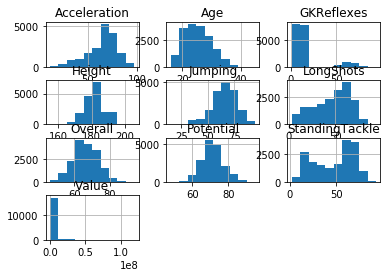

In [101]:
X.hist()

In [103]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [104]:
sc = StandardScaler()
sc.fit(X)
Xs = pd.DataFrame(sc.transform(X),columns=best)

In [106]:
sc = MinMaxScaler()
sc.fit(X)
Xm = pd.DataFrame(sc.transform(X),columns=best)

In [111]:
pca = PCA(n_components=2)
pca.fit(Xs)
Xp = pd.DataFrame(pca.transform(Xs),columns=['p1','p2'])
print(pca.explained_variance_ratio_.cumsum())

[0.32060334 0.52315107]


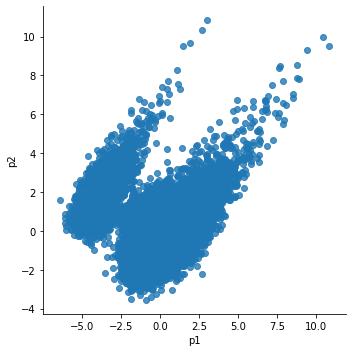

In [112]:
sns.lmplot(data=Xp,x='p1',y='p2',fit_reg=False)

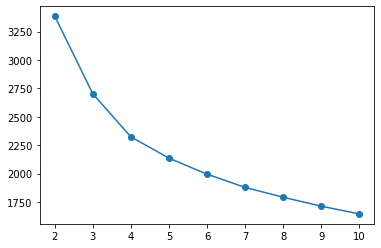

In [113]:
lst = []
for k in range(2,11):
    cl = KMeans(n_clusters=k)
    cl.fit(Xm)
    lst.append(cl.inertia_)
plt.plot(range(2,11),lst,marker='o')

In [114]:
cl = KMeans(n_clusters=4)

In [115]:
cl.fit(Xm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [116]:
Xs['cl'] = Xm['cl'] = Xp['cl'] = df['cl'] = cl.predict(Xm)

In [117]:
df.cl.value_counts(True)

3    0.302657
0    0.297634
1    0.288537
2    0.111173
Name: cl, dtype: float64

In [118]:
df[best+['cl']].groupby('cl').mean()

,LongShots,StandingTackle,Value,Overall,Acceleration,Jumping,GKReflexes,Age,Height,Potential
cl,,,,,,,,,,
0,34.798612,61.841178,7.533536e+05,62.489031,62.493906,65.641103,10.372961,23.413088,182.475162,69.512095
1,61.194391,65.888781,4.738356e+06,71.359574,67.784720,69.370406,10.695358,27.640232,179.988232,73.503482
2,12.625502,14.112952,1.612086e+06,64.562751,38.260542,57.702309,66.056727,26.017068,188.206094,69.796687
3,58.523880,28.737784,2.240148e+06,65.653513,73.315139,63.268486,10.462659,24.017702,178.716142,71.606675


In [119]:
df[best].mean().to_frame().T

,LongShots,StandingTackle,Value,Overall,Acceleration,Jumping,GKReflexes,Age,Height,Potential
0,47.130316,47.684005,2.448629e+06,66.236801,64.601518,65.116475,16.68367,25.105257,181.257025,71.329334


In [135]:
df.loc[df.cl==3].sample(n=5)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,cl
8955,189224,Júnior Negão,31,Brazil,66,66,Ulsan Hyundai FC,575000.0,3000.0,Left,1.0,2.0,3.0,Medium/ Medium,ST,30.0,187.96,83.082,41.0,68.0,59.0,57.0,70.0,66.0,64.0,52.0,58.0,64.0,68.0,69.0,63.0,62.0,53.0,60.0,52.0,62.0,76.0,55.0,73.0,23.0,67.0,57.0,59.0,53.0,34.0,33.0,34.0,13.0,7.0,6.0,16.0,9.0,719000.0,3
14940,242545,M. Hausjell,19,Austria,60,73,FC Admira Wacker Mödling,400000.0,1000.0,Right,1.0,3.0,2.0,Medium/ Medium,RM,24.0,172.72,68.100,62.0,60.0,28.0,56.0,42.0,65.0,47.0,32.0,41.0,59.0,75.0,72.0,73.0,55.0,80.0,48.0,72.0,60.0,42.0,51.0,30.0,20.0,55.0,45.0,46.0,41.0,17.0,23.0,24.0,13.0,10.0,7.0,12.0,14.0,830000.0,3
8338,232861,K. Mizunuma,28,Japan,67,67,Cerezo Osaka,775000.0,3000.0,Right,1.0,4.0,3.0,High/ Low,RM,7.0,175.26,72.186,61.0,67.0,46.0,69.0,50.0,67.0,52.0,54.0,59.0,67.0,66.0,67.0,77.0,67.0,67.0,62.0,46.0,69.0,71.0,57.0,49.0,40.0,69.0,64.0,57.0,51.0,35.0,37.0,34.0,13.0,7.0,12.0,15.0,13.0,969000.0,3
1469,206517,J. Grealish,22,England,76,84,Aston Villa,11500000.0,18000.0,Right,1.0,3.0,4.0,Medium/ Medium,LCM,10.0,175.26,68.100,69.0,60.0,36.0,78.0,66.0,80.0,71.0,65.0,71.0,81.0,77.0,72.0,84.0,65.0,82.0,62.0,34.0,72.0,48.0,69.0,48.0,41.0,68.0,77.0,58.0,75.0,40.0,38.0,36.0,11.0,6.0,11.0,10.0,13.0,24200000.0,3
16644,240107,J. Padilla,19,Mexico,57,76,Pachuca,220000.0,2000.0,Right,1.0,3.0,2.0,Medium/ Medium,RW,90.0,175.26,63.106,57.0,61.0,48.0,54.0,55.0,68.0,45.0,48.0,47.0,66.0,42.0,49.0,58.0,57.0,60.0,71.0,48.0,31.0,35.0,46.0,31.0,23.0,54.0,46.0,58.0,49.0,26.0,30.0,27.0,13.0,7.0,7.0,6.0,8.0,512000.0,3


In [138]:
for v in vard:
    aux = df[['cl',v,'ID']].copy()
    aux = aux.pivot_table(index=v,columns='cl',values='ID',aggfunc='count')
    for i in range(4):
        aux[i]/=aux[i].sum()
    print (aux)
    print('\n')

cl                  0         1         2         3
Nationality                                        
Afghanistan  0.000375       NaN       NaN  0.000369
Albania      0.002438  0.002321  0.001004  0.002213
Algeria      0.001875  0.005416  0.002510  0.003135
Andorra      0.000188       NaN       NaN       NaN
Angola       0.000563  0.000580       NaN  0.001660
...               ...       ...       ...       ...
Uzbekistan   0.000188  0.000193       NaN       NaN
Venezuela    0.002438  0.002128  0.001506  0.005901
Wales        0.009376  0.005996  0.007028  0.006085
Zambia            NaN  0.000387       NaN  0.001291
Zimbabwe     0.000375  0.001354       NaN  0.000738

[163 rows x 4 columns]


cl                            0         1         2         3
Club                                                         
 SSV Jahn Regensburg   0.001875  0.001161  0.001506  0.001844
1. FC Heidenheim 1846  0.001875  0.001161  0.001506  0.001660
1. FC Kaiserslautern   0.001875  0.000774  0.00150

In [147]:
df_top = df.loc[df.cl==1].drop('cl',axis=1).reset_index(drop=True)

In [152]:
X = df_top[best]

In [153]:
X.reset_index(inplace=True,drop=True)

In [154]:
X.shape

(5170, 10)

In [155]:
sc = StandardScaler()
sc.fit(X)
Xs = pd.DataFrame(sc.transform(X),columns=best)

In [156]:
sc = MinMaxScaler()
sc.fit(X)
Xm = pd.DataFrame(sc.transform(X),columns=best)

In [157]:
pca = PCA(n_components=2)
pca.fit(Xs)
Xp = pd.DataFrame(pca.transform(Xs),columns=['p1','p2'])
print(pca.explained_variance_ratio_.cumsum())

[0.28663284 0.45561931]


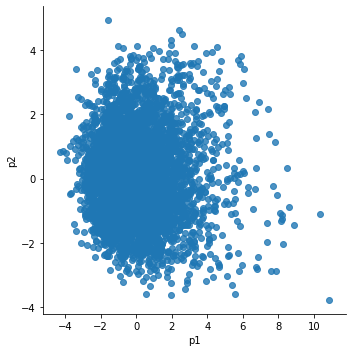

In [158]:
sns.lmplot(data=Xp,x='p1',y='p2',fit_reg=False)

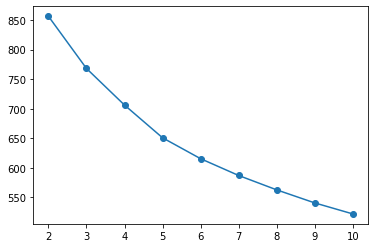

In [159]:
lst = []
for k in range(2,11):
    cl = KMeans(n_clusters=k)
    cl.fit(Xm)
    lst.append(cl.inertia_)
plt.plot(range(2,11),lst,marker='o')

In [165]:
cl = KMeans(n_clusters=6)

In [166]:
cl.fit(Xm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [167]:
Xs['cl'] = Xm['cl'] = Xp['cl'] = df_top['cl'] = cl.predict(Xm)

In [169]:
df_top.cl.value_counts(True)

0    0.218375
2    0.211992
1    0.197485
3    0.148162
4    0.145068
5    0.078917
Name: cl, dtype: float64

In [170]:
df_top[best+['cl']].groupby('cl').mean()

,LongShots,StandingTackle,Value,Overall,Acceleration,Jumping,GKReflexes,Age,Height,Potential
cl,,,,,,,,,,
0,57.174491,68.630647,2.383295e+06,70.721878,73.961027,77.263950,10.720992,27.629761,177.633516,72.094774
1,62.750245,64.714985,2.923923e+06,69.674829,70.701273,61.687561,10.570029,23.174339,179.190656,75.802155
2,60.837591,60.359489,6.554699e+05,66.289234,66.992701,67.135036,10.917883,30.073905,178.349252,66.562044
3,59.224543,69.306789,2.157493e+06,71.253264,50.391645,67.224543,10.853786,31.327676,184.806554,71.584856
4,60.750667,77.678667,1.370053e+07,78.448000,69.261333,73.553333,10.477333,26.024000,182.805493,81.445333
5,73.897059,48.002451,1.513431e+07,78.129902,75.463235,69.098039,10.443627,28.355392,178.677794,79.299020


In [172]:
df_top[best].mean().to_frame().T

,LongShots,StandingTackle,Value,Overall,Acceleration,Jumping,GKReflexes,Age,Height,Potential
0,61.194391,65.888781,4.738356e+06,71.359574,67.78472,69.370406,10.695358,27.640232,179.988232,73.503482


In [135]:
df.loc[df.cl==3].sample(n=5)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,cl
8955,189224,Júnior Negão,31,Brazil,66,66,Ulsan Hyundai FC,575000.0,3000.0,Left,1.0,2.0,3.0,Medium/ Medium,ST,30.0,187.96,83.082,41.0,68.0,59.0,57.0,70.0,66.0,64.0,52.0,58.0,64.0,68.0,69.0,63.0,62.0,53.0,60.0,52.0,62.0,76.0,55.0,73.0,23.0,67.0,57.0,59.0,53.0,34.0,33.0,34.0,13.0,7.0,6.0,16.0,9.0,719000.0,3
14940,242545,M. Hausjell,19,Austria,60,73,FC Admira Wacker Mödling,400000.0,1000.0,Right,1.0,3.0,2.0,Medium/ Medium,RM,24.0,172.72,68.100,62.0,60.0,28.0,56.0,42.0,65.0,47.0,32.0,41.0,59.0,75.0,72.0,73.0,55.0,80.0,48.0,72.0,60.0,42.0,51.0,30.0,20.0,55.0,45.0,46.0,41.0,17.0,23.0,24.0,13.0,10.0,7.0,12.0,14.0,830000.0,3
8338,232861,K. Mizunuma,28,Japan,67,67,Cerezo Osaka,775000.0,3000.0,Right,1.0,4.0,3.0,High/ Low,RM,7.0,175.26,72.186,61.0,67.0,46.0,69.0,50.0,67.0,52.0,54.0,59.0,67.0,66.0,67.0,77.0,67.0,67.0,62.0,46.0,69.0,71.0,57.0,49.0,40.0,69.0,64.0,57.0,51.0,35.0,37.0,34.0,13.0,7.0,12.0,15.0,13.0,969000.0,3
1469,206517,J. Grealish,22,England,76,84,Aston Villa,11500000.0,18000.0,Right,1.0,3.0,4.0,Medium/ Medium,LCM,10.0,175.26,68.100,69.0,60.0,36.0,78.0,66.0,80.0,71.0,65.0,71.0,81.0,77.0,72.0,84.0,65.0,82.0,62.0,34.0,72.0,48.0,69.0,48.0,41.0,68.0,77.0,58.0,75.0,40.0,38.0,36.0,11.0,6.0,11.0,10.0,13.0,24200000.0,3
16644,240107,J. Padilla,19,Mexico,57,76,Pachuca,220000.0,2000.0,Right,1.0,3.0,2.0,Medium/ Medium,RW,90.0,175.26,63.106,57.0,61.0,48.0,54.0,55.0,68.0,45.0,48.0,47.0,66.0,42.0,49.0,58.0,57.0,60.0,71.0,48.0,31.0,35.0,46.0,31.0,23.0,54.0,46.0,58.0,49.0,26.0,30.0,27.0,13.0,7.0,7.0,6.0,8.0,512000.0,3
